 # UTIVA CAPSTONE PROJECT
 
 # Telco Customers Churn Analysis and Prediction

_AKINSOLA ESAN_

### INTRODUCTION

Customer churn analysis refers to the customer attrition rate in a company. 

This analysis helps telco companies identify the cause of churn and implement effective strategies for customer retention.

The descriptive statistics of the data set will be analysed and other exploratory data analysis will be evaluated.

This analysis will involve the use of at least two different models and their results will be compared using F1 scores.

Hyper-parameter tuning will also be carried out to try and improve the performance of the model.

### TABLE-OF-CONTENT

* Introduction
* About Data
* Data Collection and Cleaning
* Splitting the Data set
* Exploratory Data Analysis
    
    a. Target variable
    
    b. Numerical variables
    
    c. Categorical variables
    
    d. Churn reason analysis
    
    
* Multicollinearity & Heat Maps

* Data Preprocessing

* Modelling and Accuracy
    
    a. Logistic Regression
    
    b. Decision Trees
    
    c. Random Forest


* Hyperparameter Tuning

* Insights and Conclusion

### ABOUT DATA

* CustomerID: A unique ID that identifies each customer. NO

* Count: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.

* Country: The country of the customer’s primary residence.

* State: The state of the customer’s primary residence.

* City: The city of the customer’s primary residence.

* Zip Code: The zip code of the customer’s primary residence.

* Lat Long: The combined latitude and longitude of the customer’s primary residence.

* Latitude: The latitude of the customer’s primary residence.

* Longitude: The longitude of the customer’s primary residence.  NO LOCATION DATA

* Gender: The customer’s gender: Male, Female

* Senior Citizen: Indicates if the customer is 65 or older: Yes, No

* Partner: Indicate if the customer has a partner: Yes, No

* Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.

* Tenure Months: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.

* Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No

* Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

* Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.

* Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

* Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

* Device Protection: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

* Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

* Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

* Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

* Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

* Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No

* Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

* Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.

* Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.

* Churn Label: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.

* Churn Value: 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.

* Churn Score: A value from 0-100 that is calculated. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.

* CLTV: Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.

* Churn Reason: A customer’s specific reason for leaving the company. Directly related to Churn Category.

In [ ]:
# loading libraries for data handling
import numpy as np
import pandas as pd

### DATA COLLECTION AND CLEANING

In [ ]:
# loading the data set
telco = pd.read_excel('Telco_customer_churn.xlsx')

In [ ]:
telco.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [ ]:
telco.info() # Used to understand the features of the columns in the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [ ]:
# from info, the data type of 'Total Charges' happens to be an object and will have to be transformed to numeric data type
telco['Total Charges']= pd.to_numeric(telco['Total Charges'], errors='coerce')

In [ ]:
telco.isnull().sum() # checking for null values in the data set

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges          11
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

It can be observed that there are 11 mising values in the 'Total Charges' column and 5174 missing values in 'Churn Reason' column

In [ ]:
telco.nunique()

CustomerID           7043
Count                   1
Country                 1
State                   1
City                 1129
Zip Code             1652
Lat Long             1652
Latitude             1652
Longitude            1651
Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          73
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1585
Total Charges        6530
Churn Label             2
Churn Value             2
Churn Score            85
CLTV                 3438
Churn Reason           20
dtype: int64

In [ ]:
telco[["Tenure Months", "Total Charges", "Monthly Charges"]][telco['Total Charges'].isnull()]
# extracting the rows with null values on 'Total Charges' column

,Tenure Months,Total Charges,Monthly Charges
2234,0,NaN,52.55
2438,0,NaN,20.25
2568,0,NaN,80.85
2667,0,NaN,25.75
2856,0,NaN,56.05
4331,0,NaN,19.85
4687,0,NaN,25.35
5104,0,NaN,20.00
5719,0,NaN,19.70
6772,0,NaN,73.35


In [ ]:
telco[["Tenure Months", "Total Charges", "Monthly Charges"]].head(3)

,Tenure Months,Total Charges,Monthly Charges
0,2,108.15,53.85
1,2,151.65,70.70
2,8,820.50,99.65


From the data set, it was observed that the 'Total charges' value for each customer was approximately the product of the 'Tenure months' and 'Monthly Charges' (as seen in Output 12). Thus, the customers with null values of 'Total Charges' had 0 tenure months with the business (as seen in Output 11). Therefore, I will be dropping the rows with the null 'Total Charges' values.

In [ ]:
# dropping the rows with null 'Total Charges' values and naming it telco2
telco2 = telco.drop(telco[telco['Total Charges'].isna()].index)

In [ ]:
telco2.shape # checking the new shape of the data set

(7032, 33)

### SPLITTING THE DATA SET

Before splitting my data set, I will be dropping some superfluous columns such as  'CustomerID', 'Count', 'Country', 'State', 'Zip Code','Lat Long', 'Latitude', 'Longitude' because they are not needed in the model.

In [ ]:
# dropping the superfluous columns and naming it telco3
telco3 =telco2.drop(['CustomerID','Count','City','Country','State', 'Zip Code','Lat Long','Latitude', 'Longitude'], axis=1)

In [ ]:
telco3.columns.values

array(['Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Tenure Months', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Online Security', 'Online Backup',
       'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges',
       'Churn Label', 'Churn Value', 'Churn Score', 'CLTV',
       'Churn Reason'], dtype=object)

In [ ]:
#loading train_test_split library
from sklearn.model_selection import train_test_split

# prevent data leakage

train, test = train_test_split(telco3,test_size=0.2,random_state=3)

In [ ]:
train.head(3)

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
5993,Male,No,No,No,6,Yes,No,DSL,Yes,No,...,Two year,Yes,Mailed check,80.25,493.40,No,0,26,2706,NaN
6405,Female,Yes,Yes,No,60,No,No phone service,DSL,No,Yes,...,Two year,Yes,Credit card (automatic),49.45,2907.55,No,0,61,4277,NaN
3682,Female,Yes,No,No,4,Yes,Yes,Fiber optic,No,No,...,Month-to-month,Yes,Electronic check,74.45,294.45,No,0,50,4093,NaN


In [ ]:
train.shape

(5625, 24)

In [ ]:
test.shape

(1407, 24)

## EXPLORATORY DATA ANALYSIS

In [ ]:
#loading visualisation libraries

import matplotlib.pyplot as plt 
import seaborn as sns

#setting style for seaborn plots
sns.set_style('whitegrid')

Text(0.5, 1.0, '% of Attrition')

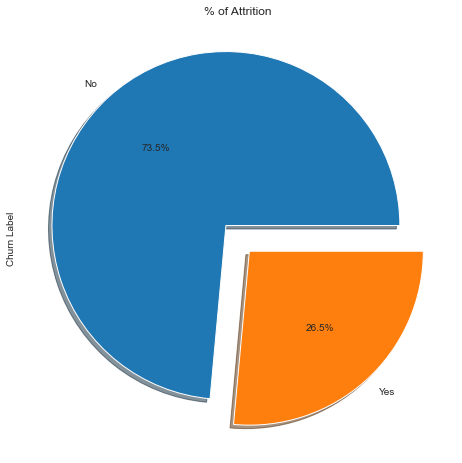

In [ ]:
#Target/Dependent variable as 'Churn Label'

train['Churn Label'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,figsize=(10,8));
plt.title("% of Attrition")

### NUMERICAL/QUANTITATIVE VARIABLES

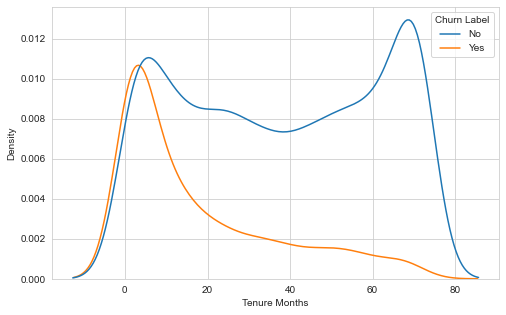

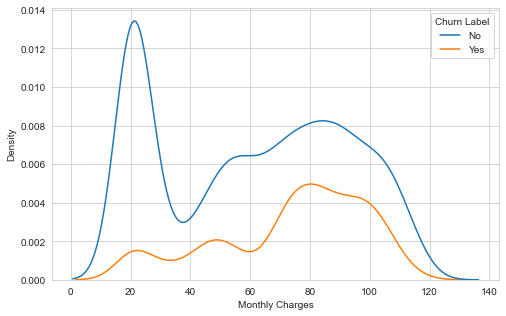

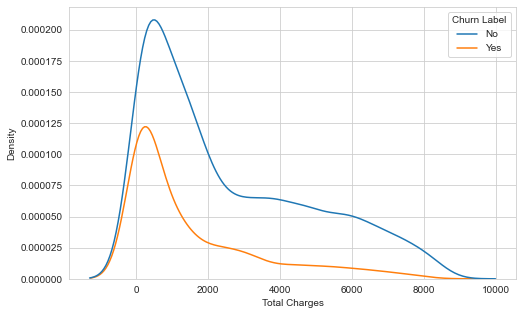

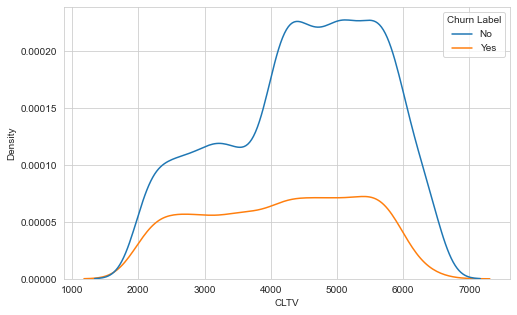

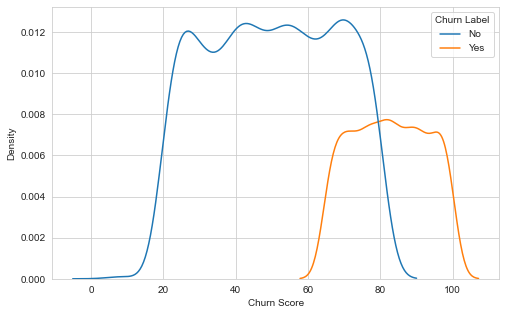

In [ ]:
# Making a KDE plot for numerical variables ('Tenure Months', 'Monthly Charges', 'Total Charges','CLTV' and 'Churn Score')
for col in ['Tenure Months', 'Monthly Charges', 'Total Charges','CLTV', 'Churn Score']:
    plt.figure(figsize=(8,5))
    sns.kdeplot(x=col, hue='Churn Label', data=train, palette ="tab10")
    plt.show()

### CATEGORICAL/QUALITATIVE VARIABLES

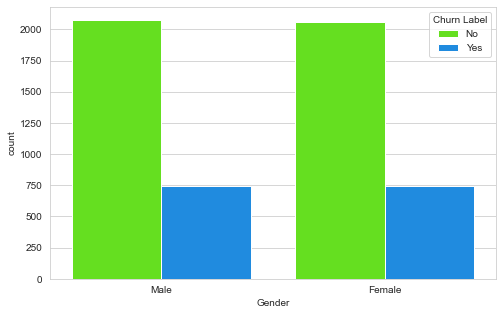

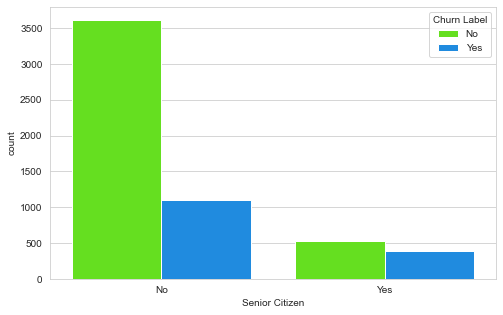

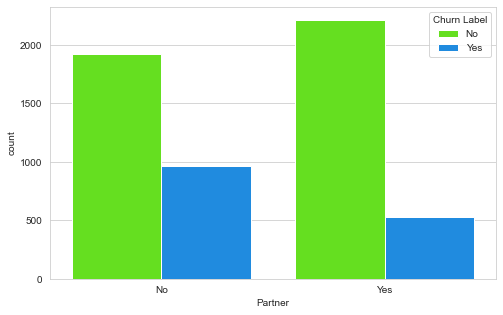

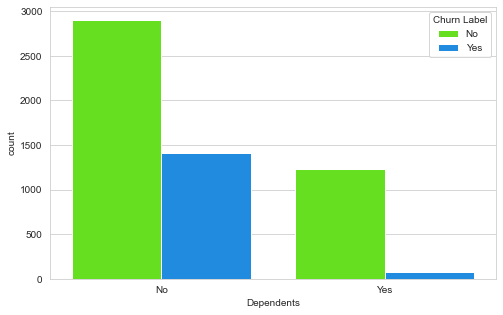

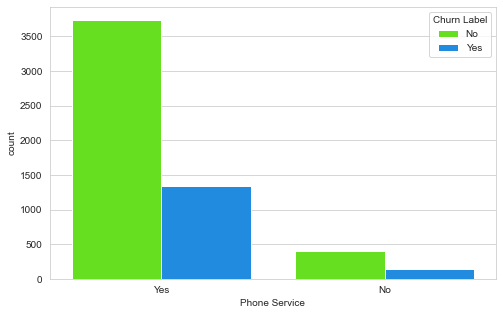

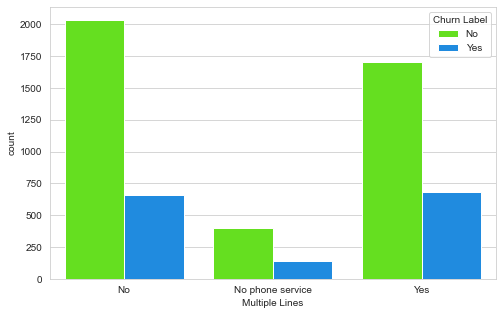

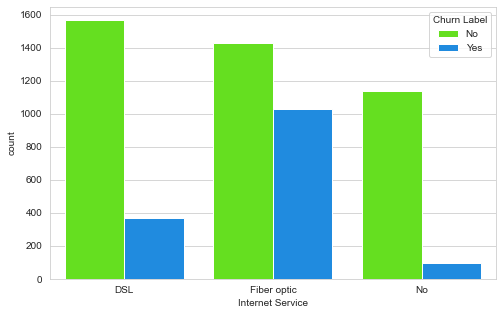

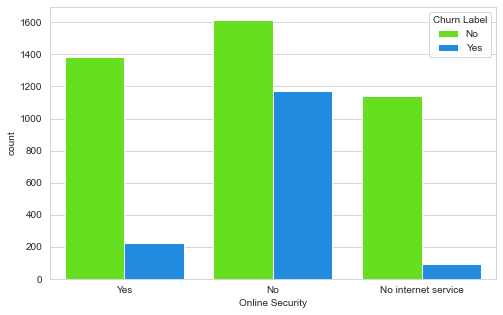

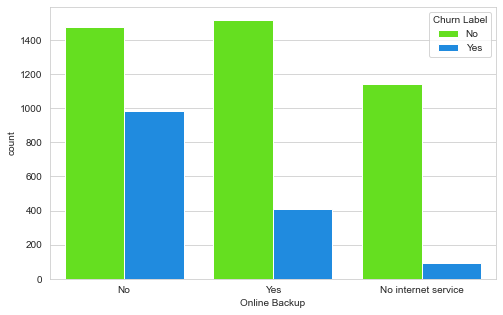

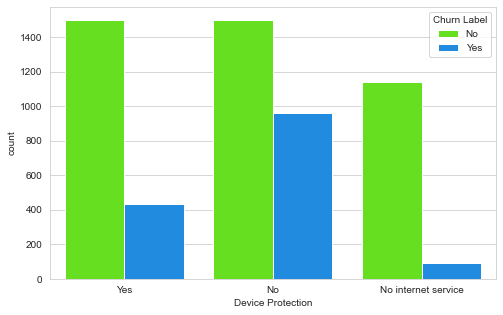

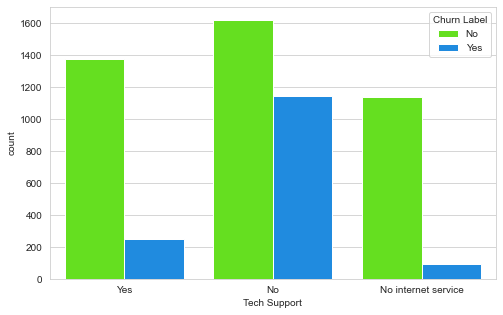

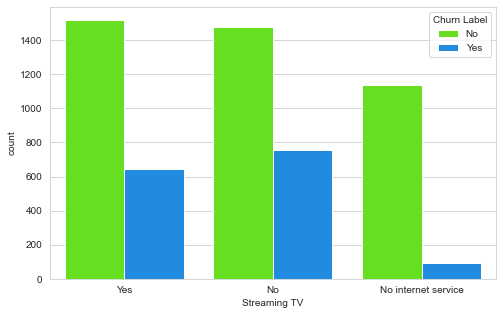

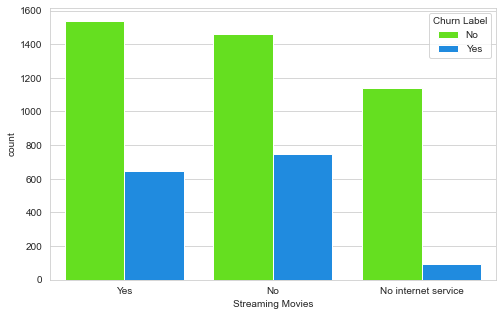

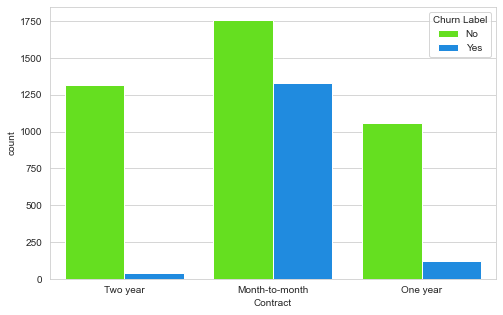

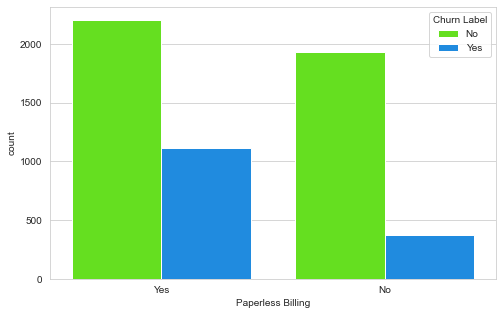

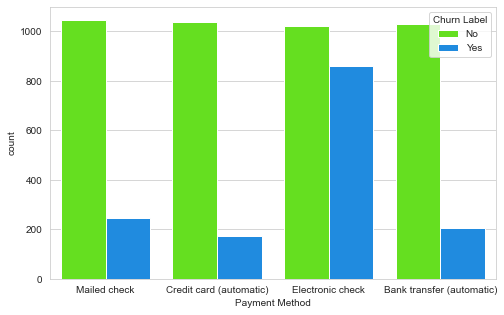

In [ ]:
# plotting a count plot for categorical variables

for col in ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Online Security', 'Online Backup',
       'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method']:
    plt.figure(figsize=(8,5))
    sns.countplot(x=col, hue='Churn Label', data= train, palette="gist_rainbow")
    plt.show()

### CHURN REASON ANALYSIS

<AxesSubplot:xlabel='count', ylabel='Churn Reason'>

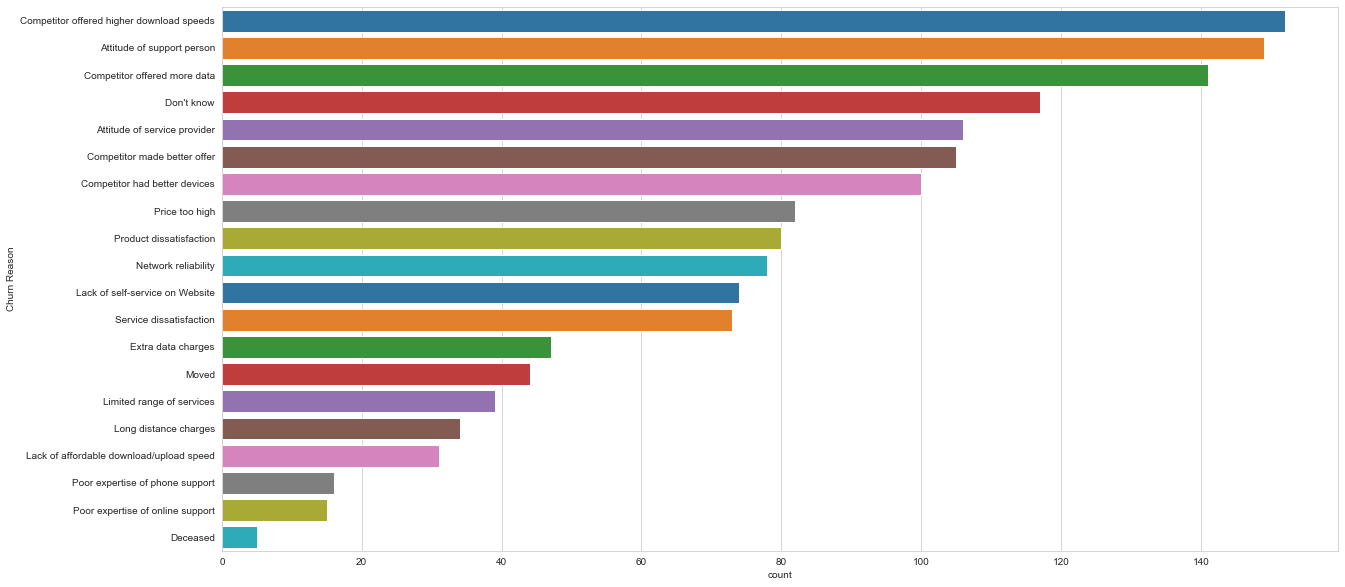

In [ ]:
fig = plt.figure(figsize=(20,10))
sns.countplot(y= "Churn Reason", data=train, palette="tab10", order= train["Churn Reason"].value_counts().index)

In [ ]:
train['Churn Reason'].value_counts()

Competitor offered higher download speeds    152
Attitude of support person                   149
Competitor offered more data                 141
Don't know                                   117
Attitude of service provider                 106
Competitor made better offer                 105
Competitor had better devices                100
Price too high                                82
Product dissatisfaction                       80
Network reliability                           78
Lack of self-service on Website               74
Service dissatisfaction                       73
Extra data charges                            47
Moved                                         44
Limited range of services                     39
Long distance charges                         34
Lack of affordable download/upload speed      31
Poor expertise of phone support               16
Poor expertise of online support              15
Deceased                                       5
Name: Churn Reason, 

### MULTICOLLINEARITY AND HEAT MAPS

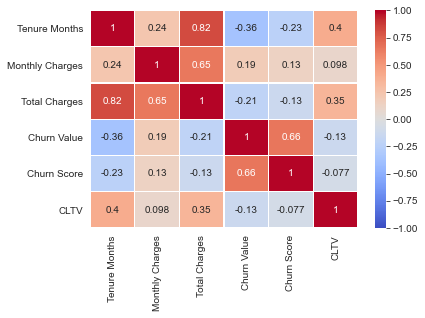

In [ ]:
# plotting a heat map and checking for high correlation/multicollinearity among the numerical variables
corr1 = train.corr()
ax = sns.heatmap(corr1, xticklabels=corr1.columns,
                 yticklabels=corr1.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

'Total charges' is highly correlated with 'Tenure months' with a coefficient of 0.83. Given that the model adopts 0.70 as the treshold for multicollinearity, the 'Total charges' column will be dropped.

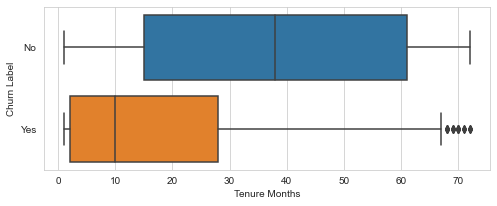

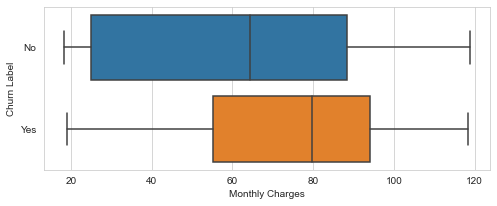

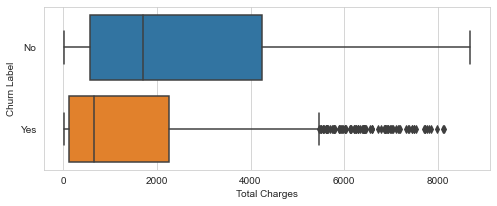

In [ ]:
# Checking for outliers in Numerical Data ('Tenure Months', 'Monthly Charges', 'Total Charges','CLTV')
for col in ['Tenure Months', 'Monthly Charges', 'Total Charges']:
    fig = plt.figure(figsize=(8,3))
    sns.boxplot(data = train, x = col, y = "Churn Label")

In [ ]:
#encoding

In [ ]:
# bringing together all the categorical variables that require encoding with one hot encoding
cols = ['Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Phone Service',
       'Multiple Lines', 'Internet Service',
       'Online Backup', 'Tech Support', 'Streaming Movies',
       'Paperless Billing', 'Payment Method','Contract','Online Security', 'Streaming TV' , 'Device Protection']

trainenc = pd.get_dummies(train, columns=cols, drop_first=True)
testenc = pd.get_dummies(test, columns=cols, drop_first=True)

In [ ]:
trainenc.shape

(5625, 35)

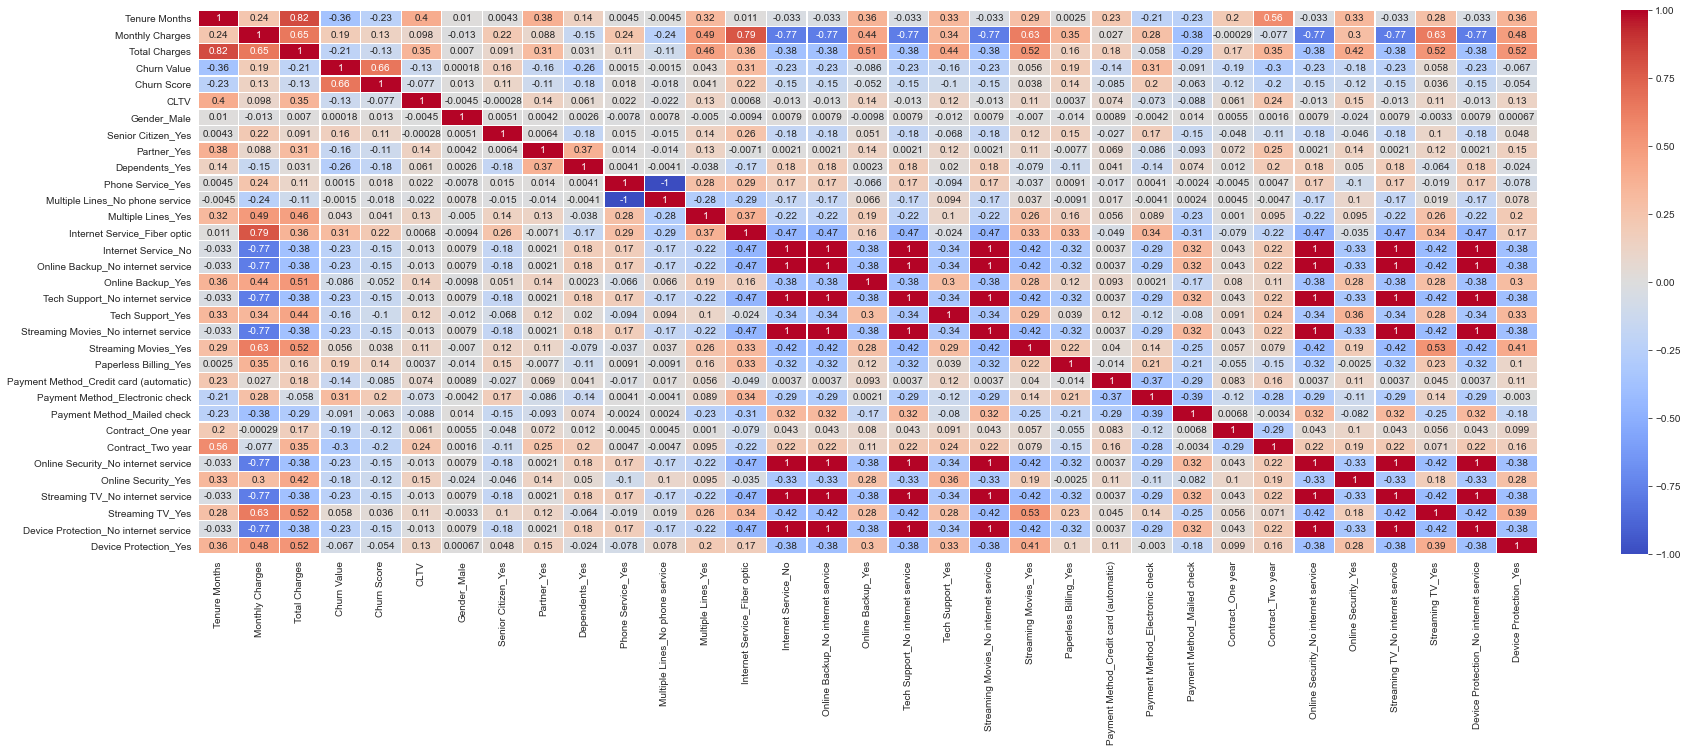

In [ ]:
corra = trainenc.corr()
fig = plt.figure(figsize=(30,10))
ax = sns.heatmap(corra, xticklabels=corra.columns,
                 yticklabels=corra.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

In [ ]:
# Dropping 'Churn Label' and 'Churn Reason'
train2 = trainenc.drop(['Churn Label','Churn Reason'], axis = 1 )
test2 = testenc.drop(['Churn Label','Churn Reason'], axis = 1 )

## MODELLING

## LOGISTIC REGRESSION MODEL

### MODELLING  WITHOUT COLLINEARITY

In [ ]:
# declaring the independent and the dependent variable
X_train2 = train2.drop(['Churn Value'], axis = 1) # independent variable
y_train2 = train2["Churn Value"]  # dependent variable


X_test2 = test2.drop(['Churn Value'], axis = 1) 
y_test2 = test2["Churn Value"]

In [ ]:
# a for train
# t for test
# balancing

from imblearn.over_sampling import SMOTE

In [ ]:
X_resampleda, y_resampleda = SMOTE().fit_resample(X_train2, y_train2)
X_resampledt, y_resampledt = SMOTE().fit_resample(X_test2, y_test2)
y_true = y_resampledt

In [ ]:
# checking the shape of the data

print(f'The previous shape of the independent variables is {X_train2.shape}')
print(f'The previous shape of the dependent variable is {y_train2.shape}')
print('\n')
print(f'The current shape of the independent variables is {X_resampleda.shape}')
print(f'The current shape of the dependent variable is {y_resampleda.shape}')

print(f'The previous shape of the independent variables is {X_test2.shape}')
print(f'The previous shape of the dependent variable is {y_test2.shape}')
print('\n')
print(f'The current shape of the independent variables is {X_resampledt.shape}')
print(f'The current shape of the dependent variable is {y_resampledt.shape}')

The previous shape of the independent variables is (5625, 32)
The previous shape of the dependent variable is (5625,)


The current shape of the independent variables is (8274, 32)
The current shape of the dependent variable is (8274,)
The previous shape of the independent variables is (1407, 32)
The previous shape of the dependent variable is (1407,)


The current shape of the independent variables is (2052, 32)
The current shape of the dependent variable is (2052,)


In [ ]:
# scaling the independent variable (because it has numerical data)

from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
scaler = MinMaxScaler()

x_scaled = scaler.fit_transform(X_resampleda)
test_x_scaled = scaler.transform(X_resampledt)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 1)

In [ ]:
# training the algorithm with the data to enable it draw conclusions on its own
lr.fit(x_scaled, y_resampleda)

LogisticRegression(random_state=1)

In [ ]:
# creating the prediction
prediction = lr.predict(test_x_scaled)
y_pred = prediction # predicted y

In [ ]:
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score,confusion_matrix,classification_report

In [ ]:
print(f'The accuracy of the model is {accuracy_score(y_resampledt, y_pred)}')

The accuracy of the model is 0.9410331384015594


In [ ]:
# checking the classification report and confusion matrix
print(classification_report(y_resampledt, y_pred))
print(confusion_matrix(y_resampledt, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1026
           1       0.93      0.95      0.94      1026

    accuracy                           0.94      2052
   macro avg       0.94      0.94      0.94      2052
weighted avg       0.94      0.94      0.94      2052

[[957  69]
 [ 52 974]]


In [ ]:
# checking the f1 score
print(f'The f1 score for this model: {f1_score(y_resampledt,y_pred)}')

The f1 score for this model: 0.9415176413726438


In [ ]:
f1 = f1_score(y_resampledt, y_pred)
print('F1: {}'.format((f1*100), 2))

F1: 94.15176413726438


### MODELLING  WITH COLLINEARITY

In [ ]:
# declaring the independent and the dependent variable

X_train3 = train2.drop(['Churn Value','Phone Service_Yes',
                        'Online Backup_No internet service',
                        'Tech Support_No internet service',
                        'Streaming Movies_No internet service',
                        'Online Security_No internet service',
                        'Streaming TV_No internet service',
                        'Device Protection_No internet service'], axis = 1)   # independent variable

y_train3 = train2["Churn Value"]  # dependent variable


X_test3 = test2.drop(['Churn Value','Churn Value','Phone Service_Yes',
                      'Online Backup_No internet service',
                      'Tech Support_No internet service',
                      'Streaming Movies_No internet service',
                      'Online Security_No internet service',
                      'Streaming TV_No internet service',
                      'Device Protection_No internet service'], axis = 1)

y_test3 = test2["Churn Value"]

In [ ]:
X_resampleda2, y_resampleda2 = SMOTE().fit_resample(X_train3, y_train3)
X_resampledt2, y_resampledt2 = SMOTE().fit_resample(X_test3, y_test3)

y_true2 = y_resampledt2

In [ ]:
scaler = MinMaxScaler()

x_scaled2 = scaler.fit_transform(X_resampleda2)
test_x_scaled2 = scaler.transform(X_resampledt2)

In [ ]:
lr = LogisticRegression(random_state = 1)

In [ ]:
lr.fit(x_scaled2, y_resampleda2)

LogisticRegression(random_state=1)

In [ ]:
prediction2 = lr.predict(test_x_scaled2)
y_pred2 = prediction2

In [ ]:
print(f'The accuracy of the model is {accuracy_score(y_true2, y_pred2)}')

The accuracy of the model is 0.9405458089668616


In [ ]:
print(classification_report(y_true2, y_pred2))
print(confusion_matrix(y_true2, y_pred2))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1026
           1       0.93      0.95      0.94      1026

    accuracy                           0.94      2052
   macro avg       0.94      0.94      0.94      2052
weighted avg       0.94      0.94      0.94      2052

[[954  72]
 [ 50 976]]


In [ ]:
# checking the f1 score
print(f'The f1 score for this model: {f1_score(y_true2,y_pred2)}')

The f1 score for this model: 0.9411764705882353


In [ ]:
f1 = f1_score(y_true2, y_pred2)
print('F1: {}'.format((f1*100), 2))

F1: 94.11764705882352


### MODELLING  WITHOUT CHURN SCORE

In [ ]:
X_train4 = X_train3.drop(['Churn Score'], axis = 1)
y_train4 = y_train3


X_test4 = X_test3.drop(['Churn Score'], axis = 1)
y_test4 = y_test3

In [ ]:
X_train4.shape

(5625, 24)

In [ ]:
X_train4.columns.values

array(['Tenure Months', 'Monthly Charges', 'Total Charges', 'CLTV',
       'Gender_Male', 'Senior Citizen_Yes', 'Partner_Yes',
       'Dependents_Yes', 'Multiple Lines_No phone service',
       'Multiple Lines_Yes', 'Internet Service_Fiber optic',
       'Internet Service_No', 'Online Backup_Yes', 'Tech Support_Yes',
       'Streaming Movies_Yes', 'Paperless Billing_Yes',
       'Payment Method_Credit card (automatic)',
       'Payment Method_Electronic check', 'Payment Method_Mailed check',
       'Contract_One year', 'Contract_Two year', 'Online Security_Yes',
       'Streaming TV_Yes', 'Device Protection_Yes'], dtype=object)

In [ ]:
X_train4.head()

,Tenure Months,Monthly Charges,Total Charges,CLTV,Gender_Male,Senior Citizen_Yes,Partner_Yes,Dependents_Yes,Multiple Lines_No phone service,Multiple Lines_Yes,...,Streaming Movies_Yes,Paperless Billing_Yes,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Contract_One year,Contract_Two year,Online Security_Yes,Streaming TV_Yes,Device Protection_Yes
5993,6,80.25,493.40,2706,1,0,0,0,0,0,...,1,1,0,0,1,0,1,1,1,1
6405,60,49.45,2907.55,4277,0,1,1,0,1,0,...,1,1,1,0,0,0,1,0,1,0
3682,4,74.45,294.45,4093,0,1,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
7011,13,80.50,1011.80,3895,0,0,0,0,0,0,...,1,1,0,1,0,0,0,0,0,0
4112,67,49.35,3321.35,5905,1,0,0,0,1,0,...,0,1,0,0,0,1,0,1,1,1


In [ ]:
X_resampleda3, y_resampleda3 = SMOTE().fit_resample(X_train4, y_train4)
X_resampledt3, y_resampledt3 = SMOTE().fit_resample(X_test4, y_test4)
y_true3 = y_resampledt3

In [ ]:
print(f'The previous shape of the independent variables is {X_train4.shape}')
print(f'The previous shape of the dependent variable is {y_train4.shape}')
print('\n')
print(f'The current shape of the independent variables is {X_resampleda3.shape}')
print(f'The current shape of the dependent variable is {y_resampleda3.shape}')

print(f'The previous shape of the independent variables is {X_test4.shape}')
print(f'The previous shape of the dependent variable is {y_test4.shape}')
print('\n')
print(f'The current shape of the independent variables is {X_resampledt3.shape}')
print(f'The current shape of the dependent variable is {y_resampledt3.shape}')

The previous shape of the independent variables is (5625, 24)
The previous shape of the dependent variable is (5625,)


The current shape of the independent variables is (8274, 24)
The current shape of the dependent variable is (8274,)
The previous shape of the independent variables is (1407, 24)
The previous shape of the dependent variable is (1407,)


The current shape of the independent variables is (2052, 24)
The current shape of the dependent variable is (2052,)


In [ ]:
scaler = MinMaxScaler()

x_scaled3 = scaler.fit_transform(X_resampleda3)
test_x_scaled3 = scaler.transform(X_resampledt3)

In [ ]:
lr = LogisticRegression(random_state = 1)

In [ ]:
lr.fit(x_scaled3, y_resampleda3)

LogisticRegression(random_state=1)

In [ ]:
prediction3 = lr.predict(test_x_scaled3)
y_pred3 = prediction3

In [ ]:
print(f'The accuracy of the model is {accuracy_score(y_true3, y_pred3)}')

The accuracy of the model is 0.8279727095516569


In [ ]:
print(classification_report(y_true3, y_pred3))
print(confusion_matrix(y_true3, y_pred3))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82      1026
           1       0.81      0.86      0.83      1026

    accuracy                           0.83      2052
   macro avg       0.83      0.83      0.83      2052
weighted avg       0.83      0.83      0.83      2052

[[821 205]
 [148 878]]


In [ ]:
# checking the f1 score
print(f'The f1 score for this model: {f1_score(y_true3,y_pred3)}')

The f1 score for this model: 0.8326220957799905


In [ ]:
f1 = f1_score(y_true3, y_pred3)
print('F1: {}'.format((f1*100), 2))

F1: 83.26220957799904


## Decision Trees

In [ ]:
# load libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_scaled, y_resampleda)

Y_pred1 = decision_tree.predict(test_x_scaled)

In [ ]:
print(accuracy_score(y_resampledt, Y_pred1))
print(classification_report(y_resampledt, Y_pred1))
print(confusion_matrix(y_resampledt3, Y_pred1))

0.9293372319688109
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1026
           1       0.93      0.93      0.93      1026

    accuracy                           0.93      2052
   macro avg       0.93      0.93      0.93      2052
weighted avg       0.93      0.93      0.93      2052

[[957  69]
 [ 76 950]]


In [ ]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_scaled, y_resampleda)

Y_pred = knn.predict(test_x_scaled)

In [ ]:
print(accuracy_score(y_resampledt,Y_pred ))
print(classification_report(y_resampledt, Y_pred))
print(confusion_matrix(y_resampledt3, Y_pred))

0.8377192982456141
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1026
           1       0.82      0.87      0.84      1026

    accuracy                           0.84      2052
   macro avg       0.84      0.84      0.84      2052
weighted avg       0.84      0.84      0.84      2052

[[825 201]
 [132 894]]


In [ ]:
RF = RandomForestClassifier()
RF.fit(x_scaled, y_resampleda)

Y_pred2 = RF.predict(test_x_scaled)

In [ ]:
print(accuracy_score(y_resampledt,Y_pred2 ))
print(classification_report(y_resampledt, Y_pred2))
print(confusion_matrix(y_resampledt3, Y_pred2))

0.9463937621832359
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1026
           1       0.95      0.95      0.95      1026

    accuracy                           0.95      2052
   macro avg       0.95      0.95      0.95      2052
weighted avg       0.95      0.95      0.95      2052

[[971  55]
 [ 55 971]]


### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# declaring an object for the classifier
crf = RandomForestClassifier()

In [ ]:
param_grid = {'max_depth': [7, 15],
             'n_estimators': [500, 1000],
             'random_state': [7,10],
             'min_samples_split': [5]}

In [ ]:
grid = GridSearchCV(crf, param_grid=param_grid,
                   cv=5, scoring='accuracy',
                   return_train_score=True)

In [ ]:
grid.fit(x_scaled, y_resampleda)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [7, 15], 'min_samples_split': [5],
                         'n_estimators': [500, 1000], 'random_state': [7, 10]},
             return_train_score=True, scoring='accuracy')

In [ ]:
grid.best_score_

0.9444053964206519

In [ ]:
grid.best_estimator_


RandomForestClassifier(max_depth=15, min_samples_split=5, n_estimators=1000,
                       random_state=7)

### INSIGHTS & CONCLUSION

**The key notable deductions from the EDA include:**

* The major reasons for Churn were identified to be poor customer service, superior products and competitive prices by competitors.

* The customers that were morely likely to churn and that churn more were:
    * Senior citizens and customers without partners.
    * Customers without online security,tech support and device protection.
    * Customers using 'fiber optics' as internet service.
    * Customers with month-to-month contract.
    * Customers with Electronic check payment method.
    
* Gender had no effect on the likelihood of the customers to churn.

**MODELLING**

* 'LogisticRegression', 'Decision Trees' and 'RandomForestClassifier' were the three (3) predictive methods employed in the evaluation of the model. The data set was split into the train and test data set. The train data set was used to train the algorithm and the test data set was used for the prediction of the dependent variable (Churn value).

* Each of the methods were evaluated using the F1 score and it was observed that the 'RandomForestClassifier' (0.95) performed sligltly better than the 'LogisticRegression' and the 'Decision Trees', both with approximately the same F1 score (0.94).

* Hyper parameter tuning was also employed with the 'RandomForestClassifier'.

**RECOMMENDATIONS**

* Redesign existing plans and create new products

* Review pricing

* Improve customer service delivery by re-training support staff members.

THANK YOU!

In [1]:
# Evaluation = 85%